In [1]:
import os

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset, DataLoader

In [2]:
df = pd.read_csv('Salary_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


<font size="6" color='pink'>Data Splitting</font>

In [6]:
y = df['Salary']
df.drop('Salary', axis=1, inplace=True)
X = df

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
print(f'Length of X_train is {len(X_train)}')
print(f'Length of X_test is {len(X_test)}')
print(f'Length of y_train is {len(y_train)}')
print(f'Length of X_test is {len(y_test)}')

Length of X_train is 24
Length of X_test is 6
Length of y_train is 24
Length of X_test is 6


In [9]:
print(f'Type of X_train is {type(X_train)}')
print(f'Type of X_test is {type(X_test)}')
print(f'Type of y_train is {type(y_train)}')
print(f'Type of X_test is {type(y_test)}')

Type of X_train is <class 'pandas.core.frame.DataFrame'>
Type of X_test is <class 'pandas.core.frame.DataFrame'>
Type of y_train is <class 'pandas.core.series.Series'>
Type of X_test is <class 'pandas.core.series.Series'>


<font size="4" color='yellow'>Data Scaling</font>

In [10]:
scalerX = StandardScaler()
scalery = StandardScaler()

In [11]:
X_train = scalerX.fit_transform(X_train)
X_test = scalerX.transform(X_test)

In [12]:
y_train = scalery.fit_transform(y_train.values.reshape(-1,1))
y_test = scalery.transform(y_test.values.reshape(-1,1))

In [13]:
print(f'Type of X_train is {type(X_train)}')
print(f'Type of X_test is {type(X_test)}')
print(f'Type of y_train is {type(y_train)}')
print(f'Type of X_test is {type(y_test)}')

Type of X_train is <class 'numpy.ndarray'>
Type of X_test is <class 'numpy.ndarray'>
Type of y_train is <class 'numpy.ndarray'>
Type of X_test is <class 'numpy.ndarray'>


In [14]:
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [15]:
print(type(y_train))
print(type(y_test))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [16]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

In [17]:
print(type(X_train))
print(type(X_test))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [18]:
def plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=None
):
    plt.figure(figsize=(10,6))

    # Scatter plot of training and testing data
    plt.scatter(train_data, train_labels, c='b', s=4, label="Training Data")
    plt.scatter(test_data, test_labels, c='g', s=4, label="Testing Data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")

        # Generate full range of X values
        full_range = torch.linspace(train_data.min().item(), train_data.max().item(), 100).reshape(-1,1)

        # Use inference mode to predict best-fit line
        with torch.inference_mode():
            best_fit = model(full_range).flatten()  # Ensure it is 1D

        plt.plot(full_range.flatten(), best_fit, c='y', linewidth=2, label="Best Fit Line")

    plt.legend()
    plt.xlabel("X values")
    plt.ylabel("Y values")
    plt.title("Data and Best Fit Line")
    plt.show()


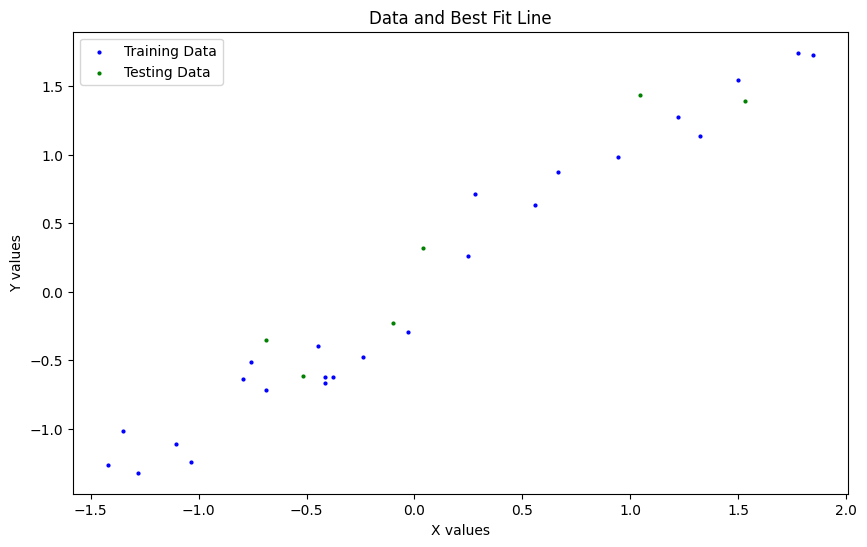

In [19]:
plot_predictions()

<font size="6" color='pink'>Defining the Model</font>

In [20]:
class SalaryPrediction(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.linear = nn.Linear(num_features, 1)

    def forward(self, X):
        return self.linear(X)

In [21]:
torch.manual_seed(42)
model = SalaryPrediction(X_train.shape[1])
print(model.state_dict())

OrderedDict({'linear.weight': tensor([[0.7645]]), 'linear.bias': tensor([0.8300])})


In [22]:
with torch.inference_mode():
    y_pred = model(X_test)
    y_pred

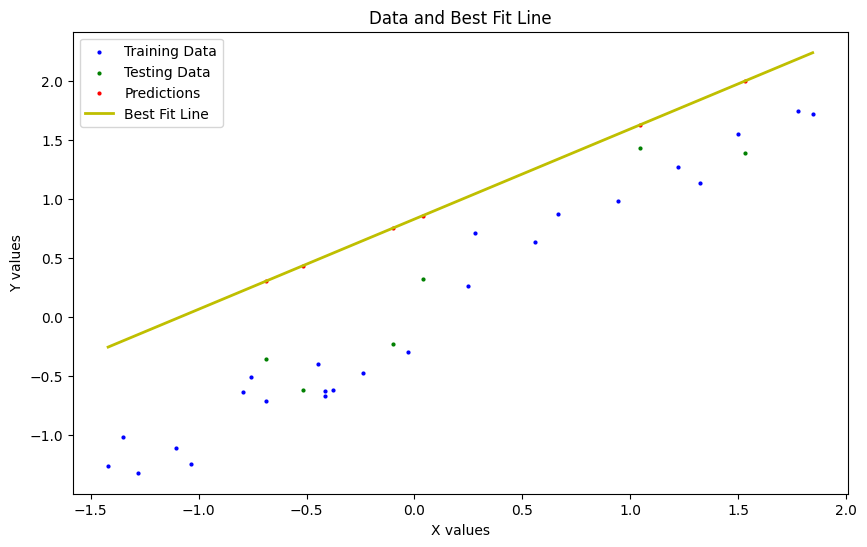

In [23]:
plot_predictions(predictions=y_pred)

<font size="4" color='yellow'>Important Parameters</font>

In [24]:
learning_rate = 0.01
epochs = 100

<font size="4" color='yellow'>Loss Function and Optimizer</font>

In [25]:
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

<font size="4" color='yellow'>Training Pipeline</font>

In [26]:
torch.manual_seed(42)
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    # Training Mode

    # Forward Propogation
    y_pred_train = model(X_train)

    # Loss Function
    loss = loss_function(y_pred_train, y_train)

    # Set Gradients to Zero
    optimizer.zero_grad()

    # Back Propogation
    loss.backward()

    # Update the Parameters
    optimizer.step()

    # Testing Mode

    model.eval()
    with torch.inference_mode():
        y_pred_test = model(X_test)

        loss_test = loss_function(y_pred_test, y_test)

    epoch_count.append(epoch)    
    loss_values.append(loss.item())    
    test_loss_values.append(loss_test.item())

    print(f"Epoch: {epoch+1} | Loss: {loss} | Test Loss: {loss_test}")
    print(model.state_dict())

Epoch: 1 | Loss: 0.7717103958129883 | Test Loss: 0.5110109448432922
OrderedDict({'linear.weight': tensor([[0.7689]]), 'linear.bias': tensor([0.8134])})
Epoch: 2 | Loss: 0.7425549030303955 | Test Loss: 0.48998865485191345
OrderedDict({'linear.weight': tensor([[0.7732]]), 'linear.bias': tensor([0.7971])})
Epoch: 3 | Loss: 0.7145540118217468 | Test Loss: 0.46986618638038635
OrderedDict({'linear.weight': tensor([[0.7773]]), 'linear.bias': tensor([0.7812])})
Epoch: 4 | Loss: 0.6876617074012756 | Test Loss: 0.4506066143512726
OrderedDict({'linear.weight': tensor([[0.7814]]), 'linear.bias': tensor([0.7656])})
Epoch: 5 | Loss: 0.6618345379829407 | Test Loss: 0.43217432498931885
OrderedDict({'linear.weight': tensor([[0.7854]]), 'linear.bias': tensor([0.7503])})
Epoch: 6 | Loss: 0.6370301246643066 | Test Loss: 0.4145354926586151
OrderedDict({'linear.weight': tensor([[0.7894]]), 'linear.bias': tensor([0.7353])})
Epoch: 7 | Loss: 0.613207995891571 | Test Loss: 0.3976571559906006
OrderedDict({'line

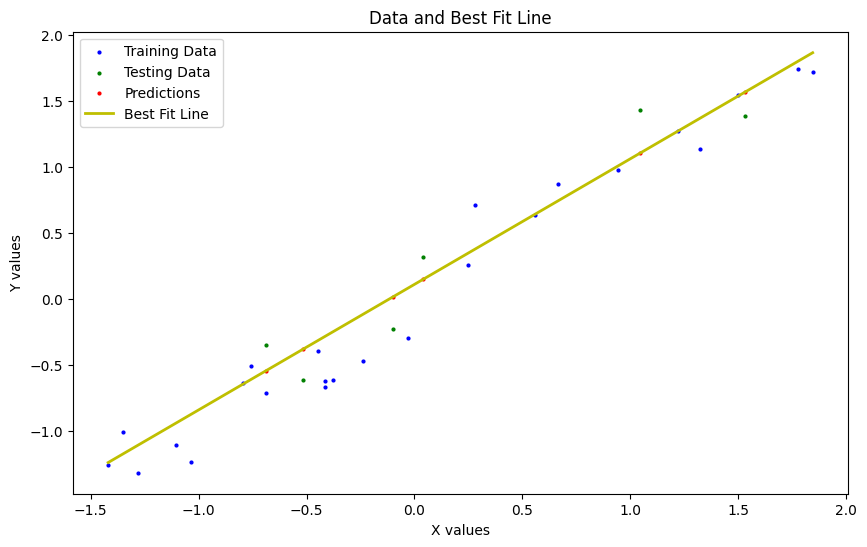

In [27]:
plot_predictions(predictions=y_pred_test)

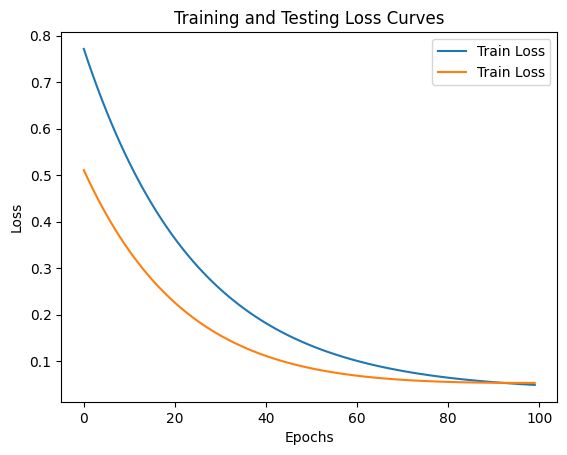

In [28]:
plt.plot(epoch_count, loss_values, label='Train Loss')
plt.plot(epoch_count, test_loss_values, label='Train Loss')
plt.title("Training and Testing Loss Curves")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<font size="6" color='pink'>Saving and Loading the Model</font>

<font size="4" color='yellow'>Saving and Loading Whole Model</font>

In [29]:
num_features = X_train.shape[1]
model = SalaryPrediction(num_features)

In [30]:
os.makedirs("Model/Full_Models", exist_ok=True)
os.makedirs("Model/Models_Parameters", exist_ok=True)

In [31]:
full_model_path = "Model/Full_Models/SalaryPredictionModel.pth"
torch.save(model, full_model_path)
print(f"Full model saved at: {full_model_path}")

Full model saved at: Model/Full_Models/SalaryPredictionModel.pth


In [32]:
loaded_full_model = torch.load(full_model_path, weights_only=False)
loaded_full_model.eval() 
print("Full model loaded successfully!")

Full model loaded successfully!


<font size="4" color='yellow'>Saving and Loading only Parameters of Model(Weights and Bias)</font>

In [33]:
params_model_path = "Model/Models_Parameters/RegressionModelParams.pth"
torch.save(model.state_dict(), params_model_path)
print(f"Model parameters saved at: {params_model_path}")

Model parameters saved at: Model/Models_Parameters/RegressionModelParams.pth


In [34]:
num_features = X_train.shape[1]
model_with_loaded_params = SalaryPrediction(num_features)

# Load the saved parameters into the model
model_with_loaded_params.load_state_dict(torch.load(params_model_path))
model_with_loaded_params.eval()
print("Model with only parameters loaded successfully!")

Model with only parameters loaded successfully!
